<a href="https://colab.research.google.com/github/Elilora/Hamoye_Quizzes/blob/main/Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
# Importing libraries 
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_yearly, plot_weekly
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error


In [162]:
# Loadig the given dataset
time_series=pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET.csv")

In [163]:
time_series.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [164]:
# convert date time
time_series["FullDate"]=pd.to_datetime(time_series["FullDate"])
time_series.set_index("FullDate", inplace=True)

In [165]:
time_series.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [166]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [167]:
time_series.isnull().any()  

Tmax         False
SysLoad      False
GasPrice     False
ElecPrice    False
dtype: bool

QUESTION 11

In [168]:
#resampling
time_series_daily = time_series.resample('D').sum()

Text(0, 0.5, 'Electricity Price')

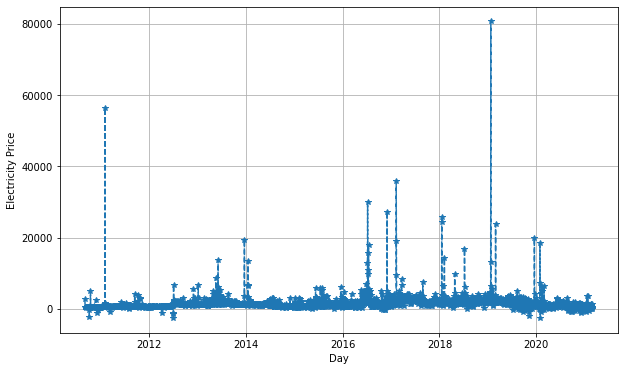

In [169]:
# Plot daily sampling
plt.figure(figsize=(10 , 6 ))
plt.plot(time_series_daily.index, time_series_daily.ElecPrice, '--' , marker= '*' )
plt.grid()
plt.xlabel( 'Day' )
plt.ylabel( 'Electricity Price' )

QUESTION 12 AND 13

In [170]:
SysLoad_adfuller = adfuller(time_series_daily['SysLoad'])
SysLoad_adfuller

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [171]:
GasPrice_adfuller = adfuller(time_series_daily['GasPrice'])
GasPrice_adfuller

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [172]:
ElecPrice_adfuller = adfuller(time_series_daily[ 'ElecPrice'])
ElecPrice_adfuller

(-8.269053866873803,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

In [173]:
time_series_copy = time_series_daily.reset_index()
time_series_copy.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [174]:
# select columns 
simple_time_series = time_series_copy[['FullDate', 'ElecPrice']]

#rename columns 
simple_time_series = simple_time_series.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

simple_time_series.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [175]:
# data Split
train_data = simple_time_series[:2757]
test_data = simple_time_series[2757:]
print('train shape', train_data.shape)
print('test shape', test_data.shape)

train shape (2757, 2)
test shape (1077, 2)


In [176]:
model = Prophet()
#train model
model.fit(train_data)
#Make predictions
Prediction= model.predict(test_data) 
Prediction.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,251.037493,4852.472156,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,256.727817,5024.197215,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,510.509914,5208.448153,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,345.153389,5041.530430,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-113.359374,4790.313752,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


QUESTION 14

In [177]:
#MAPE Evaluation
y_test = np.array(test_data['y'])
pred_test= np.array(Prediction['yhat'])

mape = np.mean(np.abs((y_test - pred_test)/y_test)) *100
print('mean_absolute_percentage_error', round(mape,2))

mean_absolute_percentage_error 549.48


QUESTION 15

In [178]:
#RMSE Evaluation
rmse = np.sqrt(mean_squared_error(y_test,pred_test))
print('root mean_squared_error', round(rmse,2))

root mean_squared_error 3218.16


QUESTION 16

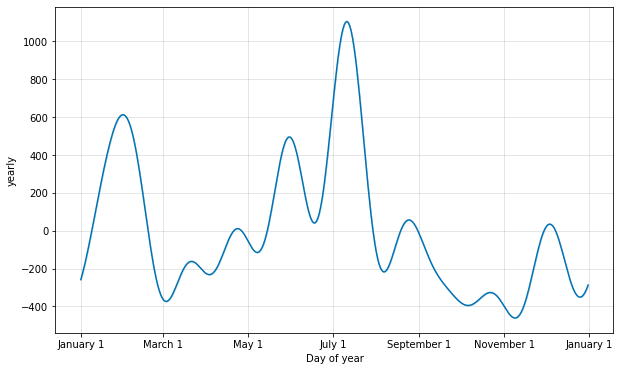

In [179]:
plot_yearly(model)

Multi Variate


In [180]:
# select columns 
multi_time_series = time_series_copy[['FullDate','Tmax',	'SysLoad',	'GasPrice', 'ElecPrice']]

#rename columns 
multi_time_series = multi_time_series.rename(columns={'FullDate':'ds', 'ElecPrice':'y','Tmax':'add1',
                                                       'SysLoad': 'add2',	'GasPrice': 'add3'})

multi_time_series.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [181]:
# assign train and test data
multi_train_data = multi_time_series[:2757]
multi_test_data = multi_time_series[2757:]
print('mulit train shape', multi_train_data.shape)
print('multi test shape', multi_test_data.shape)

mulit train shape (2757, 5)
multi test shape (1077, 5)


In [196]:
#initialize model
multi_model = Prophet()
#add regressors
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
#train model
multi_model.fit(multi_train_data)
#make predictions
multi_Prediction= multi_model.predict(multi_test_data) 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [193]:
multi_Prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,3266.286899,-223.861722,4072.205528,3266.286899,3266.286899,0.232955,0.232955,0.232955,-855.422111,...,-84.404573,-84.404573,-84.404573,-39.696234,-39.696234,-39.696234,0.0,0.0,0.0,1984.021724
1,2018-03-21,3266.967145,-128.716893,4252.650273,3266.967145,3266.967145,0.230192,0.230192,0.230192,-1025.245383,...,42.568508,42.568508,42.568508,-30.440203,-30.440203,-30.440203,0.0,0.0,0.0,1975.538349
2,2018-03-22,3267.647392,586.105834,5147.518123,3267.647392,3267.647392,0.216799,0.216799,0.216799,-214.718980,...,145.699148,145.699148,145.699148,-25.438334,-25.438334,-25.438334,0.0,0.0,0.0,2894.864116
3,2018-03-23,3268.327638,378.572362,4865.804471,3268.327638,3268.327638,0.208933,0.208933,0.208933,-274.590365,...,-44.230751,-44.230751,-44.230751,-24.549176,-24.549176,-24.549176,0.0,0.0,0.0,2579.090018
4,2018-03-24,3269.007885,-815.198082,3636.809972,3269.007885,3269.007885,0.207020,0.207020,0.207020,-1075.234748,...,-117.662067,-117.662067,-117.662067,-27.521912,-27.521912,-27.521912,0.0,0.0,0.0,1432.758282


QUESTION 17

In [197]:
#MAPE Evaluation
multi_y_test = np.array(multi_test_data['y'])
multi_pred_test= np.array(multi_Prediction['yhat'])

mape2 = np.mean(np.abs((multi_y_test-multi_pred_test)/multi_y_test)) *100
round(mape2,2)

236.79

QUESTION 18

In [198]:
#RMSE EValuation
rmse2 = np.sqrt(mean_squared_error(multi_y_test,multi_pred_test))
round(rmse2,2)

2712.99

QUESTION 19

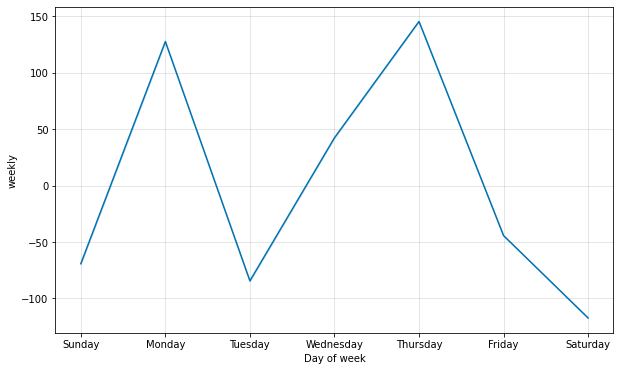

In [186]:
# daily seasonality
plot_weekly(multi_model)

In [187]:
#drop add1(T-max)
multi_time_series.drop(['add1'], axis=1, inplace=True)

In [190]:
multi_model_2 = Prophet(daily_seasonality=True)
# Adding regressors
multi_model_2.add_regressor('add2')
multi_model_2.add_regressor('add3')
#training model
multi_model_2.fit(multi_train_data )
#making predictions
multi_prediction_2 = multi_model_2.predict(multi_test_data)

QUESTION 20

In [191]:
#MAPE Evaluation
multi_y_test2 = np.array(multi_test_data['y'])
multi_pred_test2= np.array(multi_prediction_2['yhat'])

mape3 = np.mean(np.abs((multi_y_test2-multi_pred_test2)/multi_y_test2)) *100
round(mape3,2)

235.13